In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
from census import Census
from us import states

In [3]:
states.lookup('DC')

<State:District of Columbia>

In [4]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv', \
                 parse_dates=True)

In [5]:
# df

In [6]:
# df = df[df['Country/Region'] == 'US']

In [7]:
df = df[df['Province_State'] != 'Diamond Princess']
df = df[df['Province_State'] != 'Grand Princess']

In [8]:
df = df.groupby('Province_State').sum()

In [9]:
# df

In [10]:
# df.columns

In [11]:
df = df.T
df = df.drop('Lat')
df = df.drop('Long_')
df = df.drop('UID')
df = df.drop('code3')
df = df.drop('FIPS')

In [12]:
# df.columns

In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
df.index.name = 'Date'

In [15]:
today = df.iloc[-1]

In [16]:
condition = today[(today > 1000)].index

In [17]:
print(condition)

Index(['California', 'Colorado', 'Connecticut', 'Florida', 'Georgia',
       'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts',
       'Michigan', 'New Jersey', 'New York', 'North Carolina', 'Ohio',
       'Pennsylvania', 'Recovered', 'Tennessee', 'Texas', 'Washington',
       'Wisconsin'],
      dtype='object', name='Province_State')


In [18]:
min_case_num = 1000
title_name = "USA"

In [19]:
data = {}
data_original = {}

for s in condition:
    state = df[s]
    state0 = state[state > min_case_num]
    
    state0 = state0.reset_index()
    state0 = state0[s]
    
    data[s] = state0
    data_original[s] = df[s]

Text(0.5, 0, 'Days after passing 1000 confirmed cases')

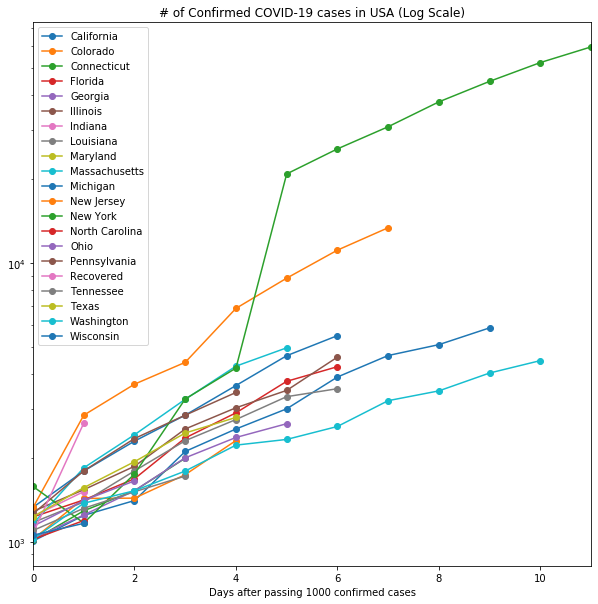

In [20]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Days after passing 1000 confirmed cases')

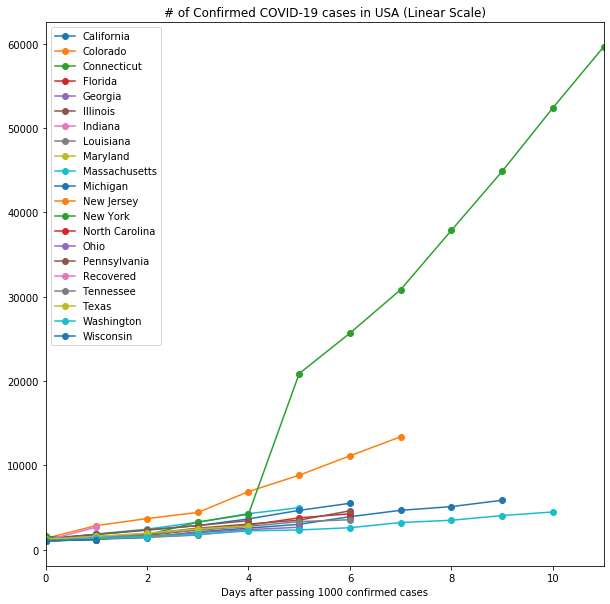

In [21]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Dates')

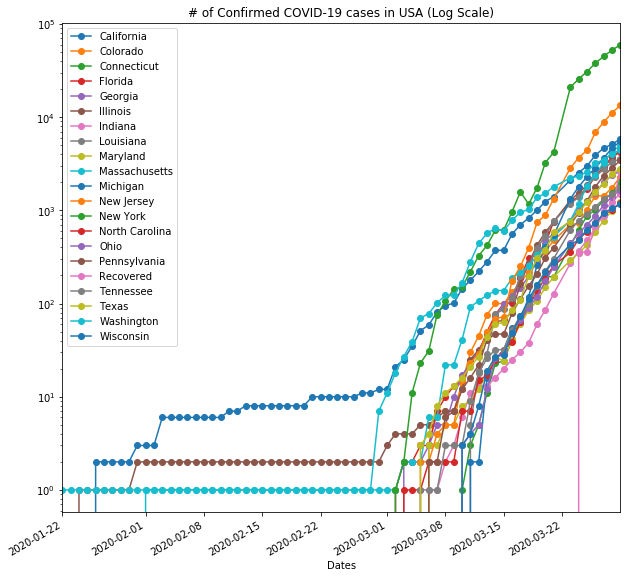

In [22]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

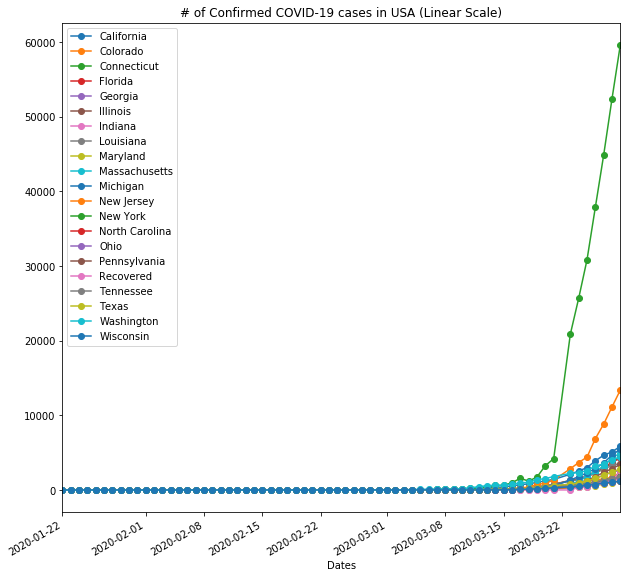

In [23]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Dates")

In [24]:
today.sum()

143407.0

In [25]:
for c in data.keys():
    if len(data[c]) > 1:
        growth_rate = data[c].tail(5).pct_change().mean()
        num_cases = data[c].iloc[-1]
        projected_num_cases = int(num_cases*(1+growth_rate)**7)

        print(c)
        print('% growth rate:', round(growth_rate * 100, 2),'%')
        print('# Infected (today):', int(num_cases))
        print('# Infected (projected in 7 days):', int(projected_num_cases))
        print('--')

California
% growth rate: 18.44 %
# Infected (today): 5852
# Infected (projected in 7 days): 19132
--
Colorado
% growth rate: 23.57 %
# Infected (today): 2307
# Infected (projected in 7 days): 10149
--
Connecticut
% growth rate: 25.46 %
# Infected (today): 1993
# Infected (projected in 7 days): 9752
--
Florida
% growth rate: 26.44 %
# Infected (today): 4246
# Infected (projected in 7 days): 21937
--
Georgia
% growth rate: 20.95 %
# Infected (today): 2651
# Infected (projected in 7 days): 10036
--
Illinois
% growth rate: 25.58 %
# Infected (today): 4596
# Infected (projected in 7 days): 22640
--
Indiana
% growth rate: 22.71 %
# Infected (today): 1513
# Infected (projected in 7 days): 6338
--
Louisiana
% growth rate: 18.76 %
# Infected (today): 3540
# Infected (projected in 7 days): 11796
--
Massachusetts
% growth rate: 28.33 %
# Infected (today): 4963
# Infected (projected in 7 days): 28454
--
Michigan
% growth rate: 24.41 %
# Infected (today): 5488
# Infected (projected in 7 days): 253

Text(0.5, 0, 'Days after passing 1000 confirmed cases')

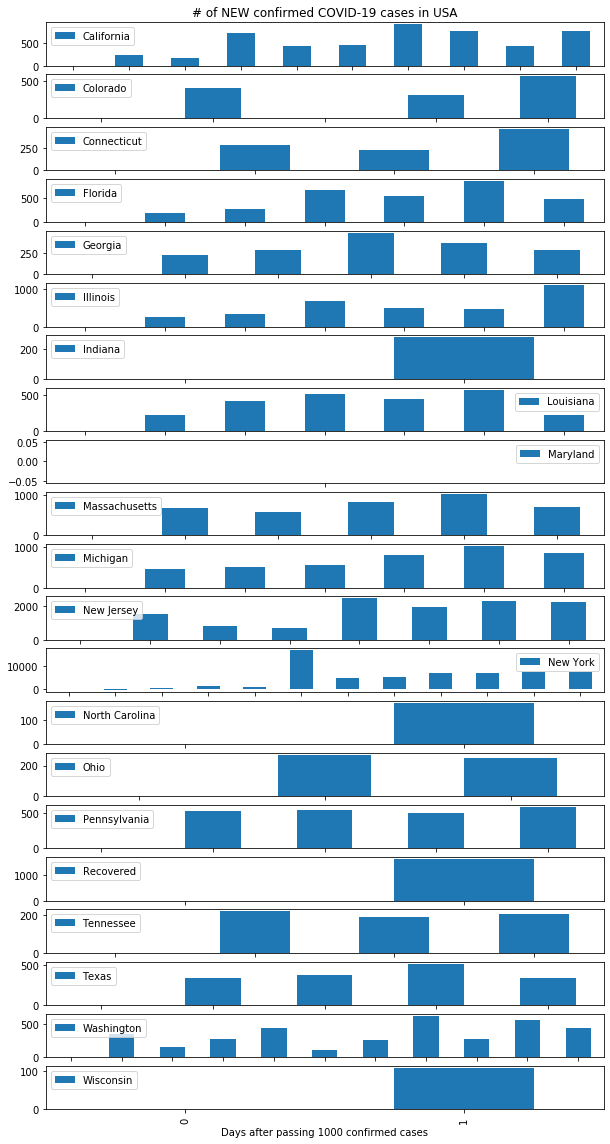

In [26]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after infecting at least 1000 people')

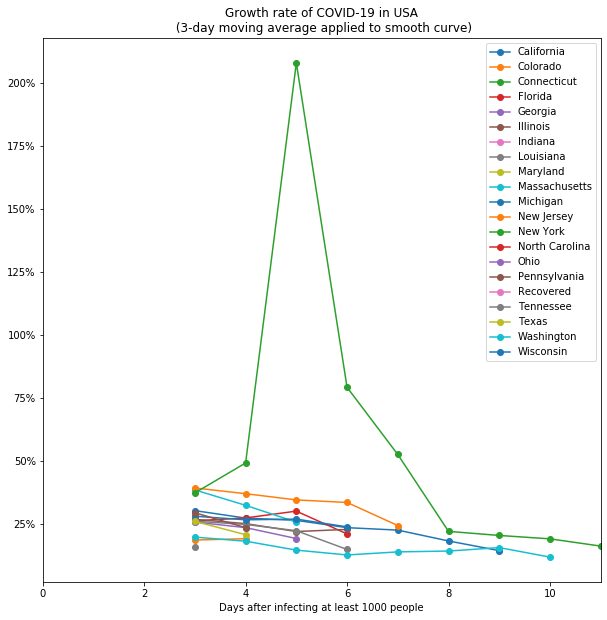

In [27]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    growth_rate = data[c].rolling(window=3).mean().pct_change() * 100.
    growth_rate.plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("Growth rate of COVID-19 in " + title_name + "\n (3-day moving average applied to smooth curve)")
axes.set_xlabel("Days after infecting at least "+str(min_case_num)+" people")